# California Housing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
#load Data
house=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Python Scripts/ML practice/housing.csv')
house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
house.shape

(20640, 10)

In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house=house.dropna()

In [7]:
house.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [8]:
house.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

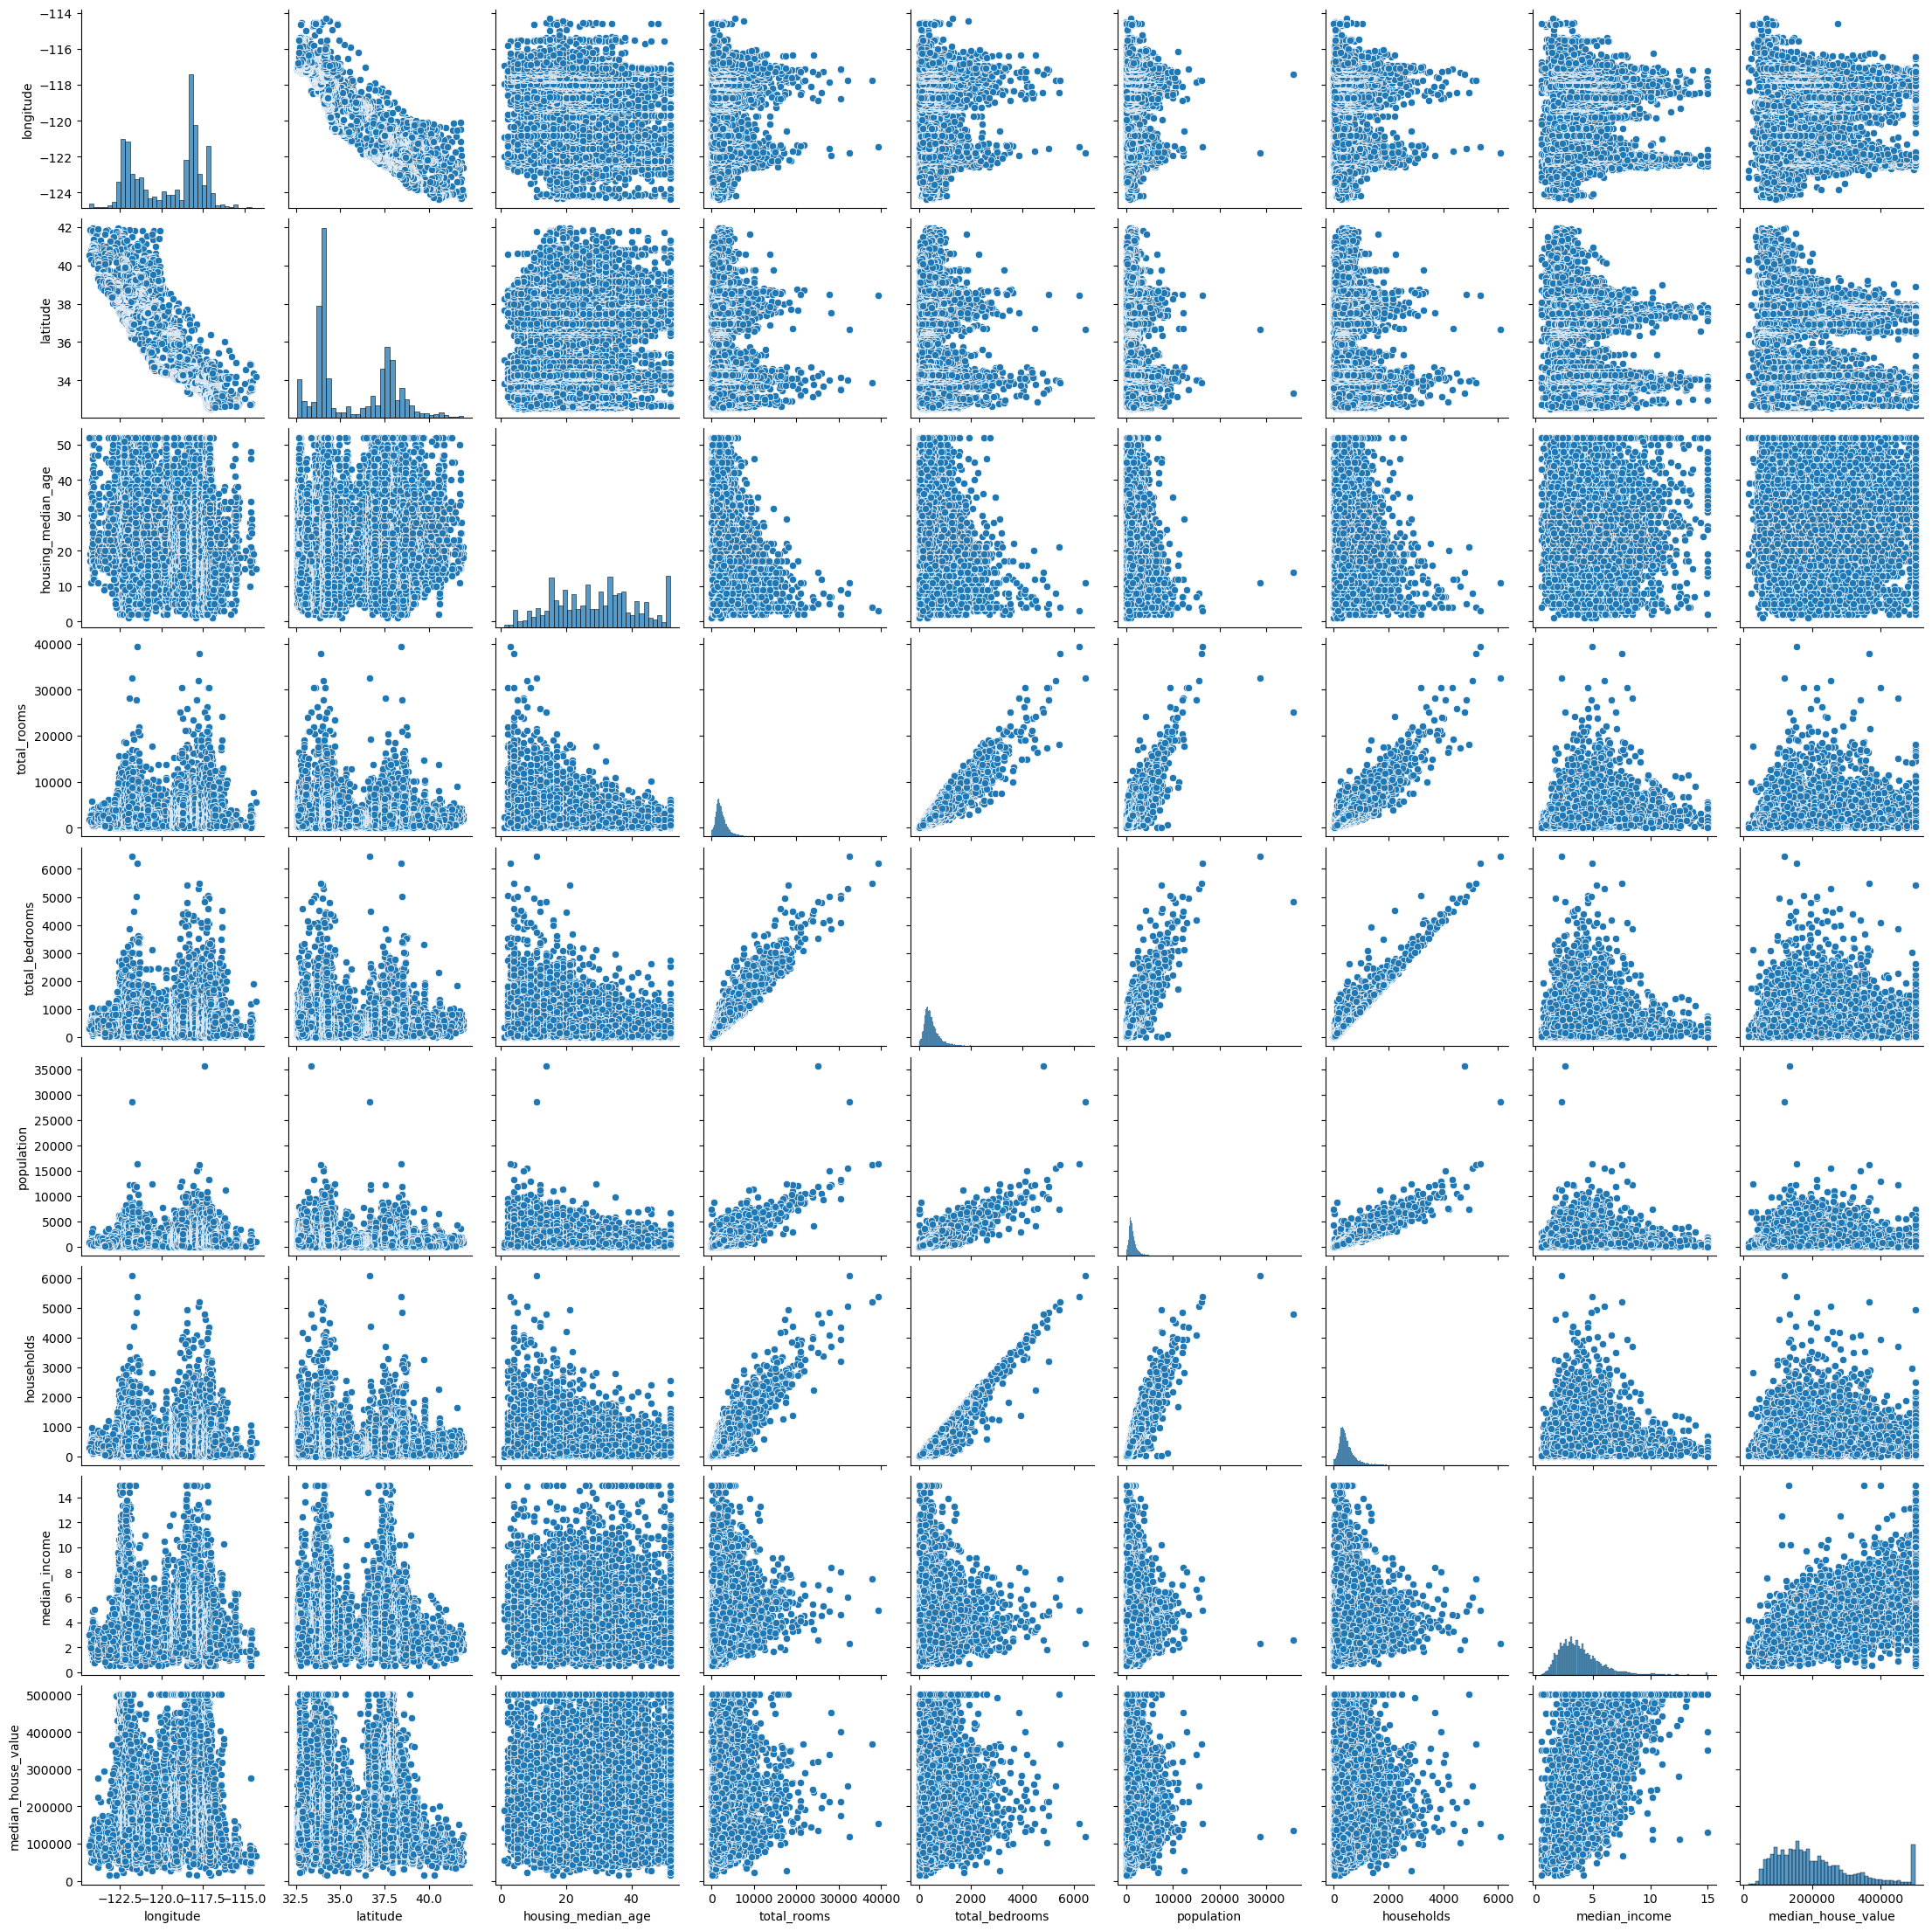

In [28]:
sns.pairplot(house)

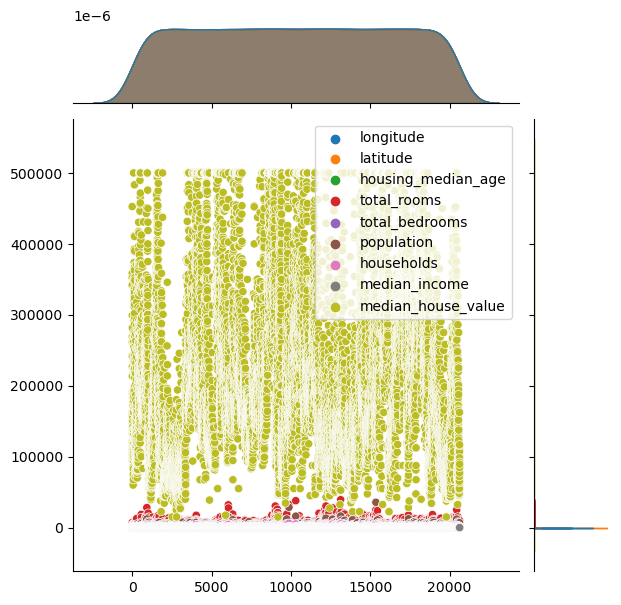

In [9]:
sns.jointplot(house)

<Axes: xlabel='median_house_value', ylabel='Density'>

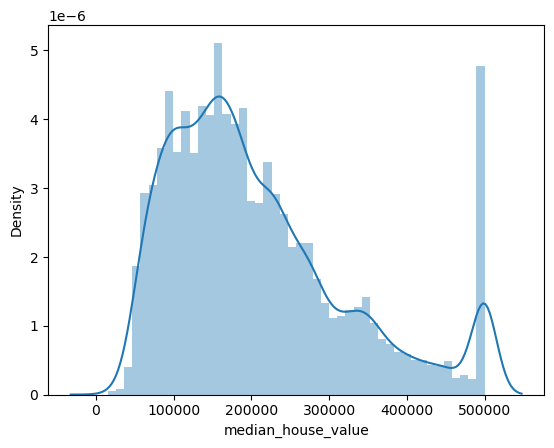

In [10]:
sns.distplot(house['median_house_value'])

<Axes: >

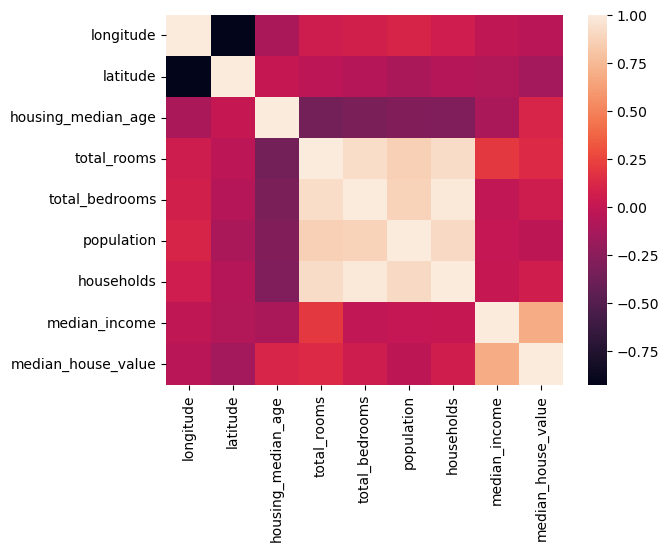

In [11]:
sns.heatmap(house.corr())

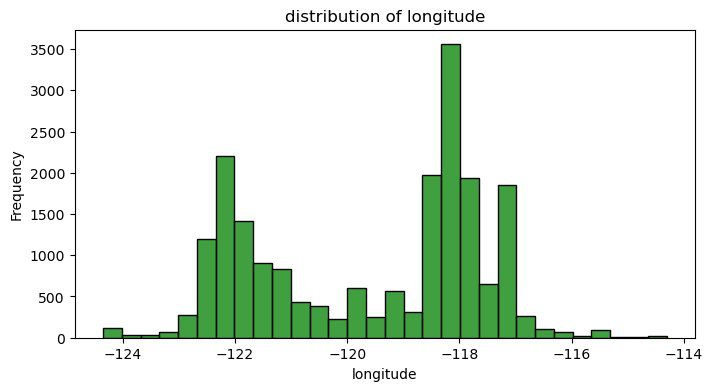

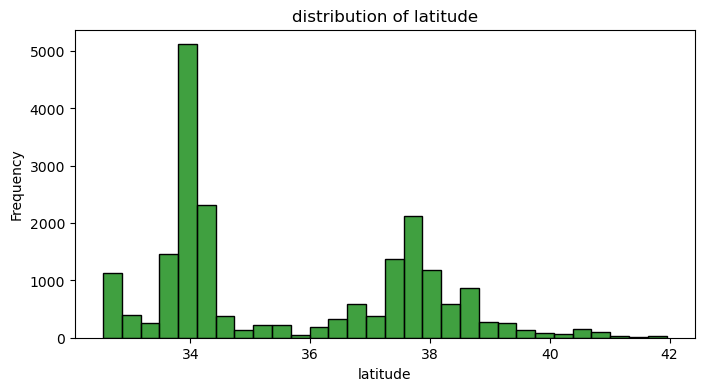

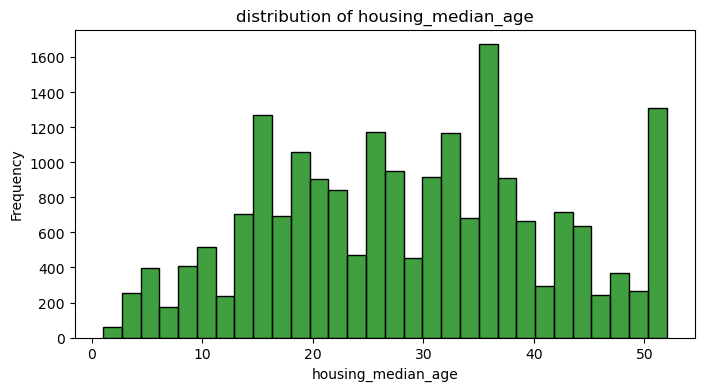

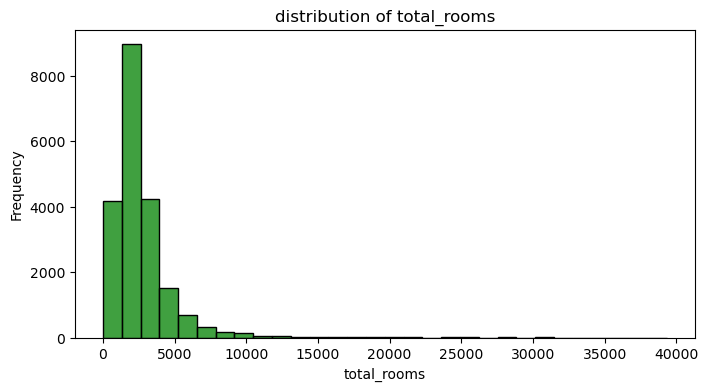

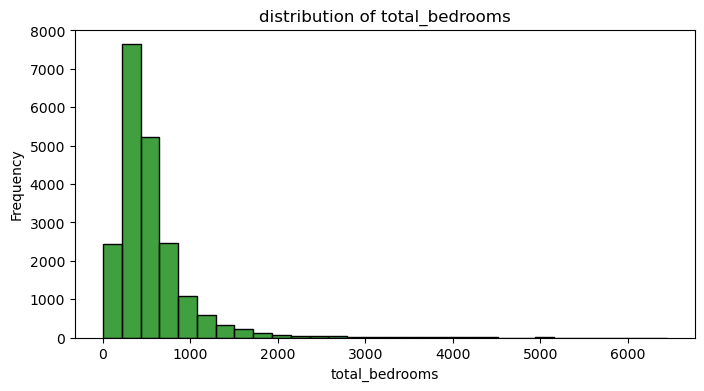

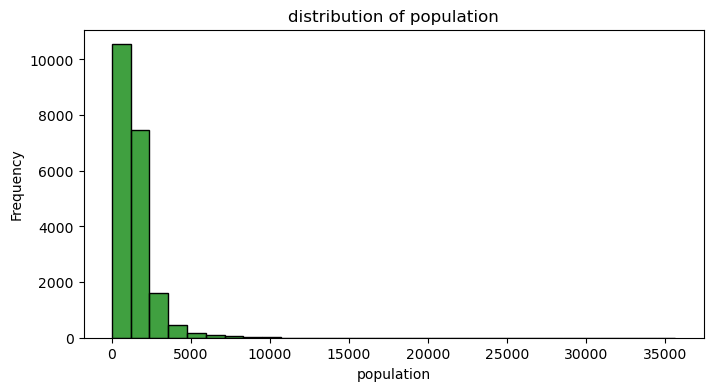

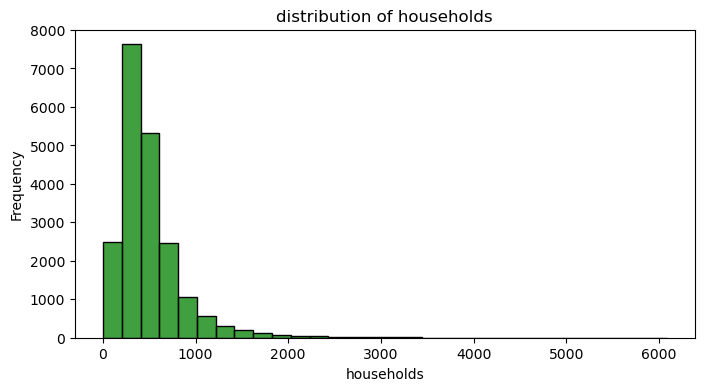

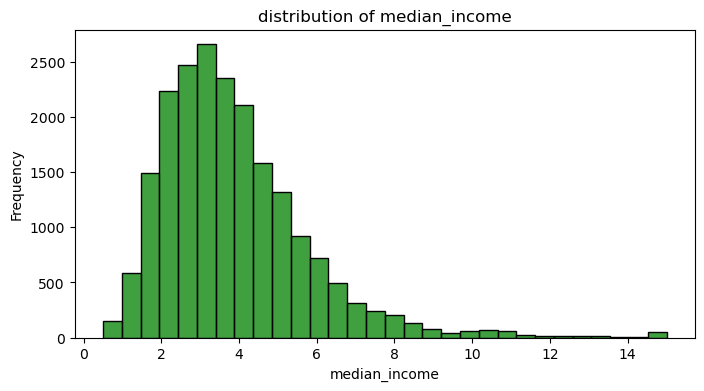

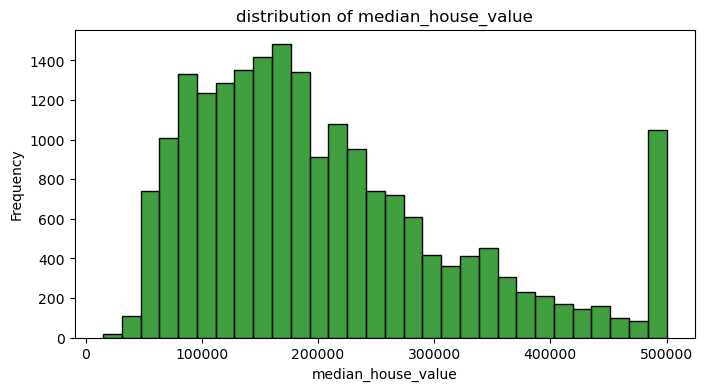

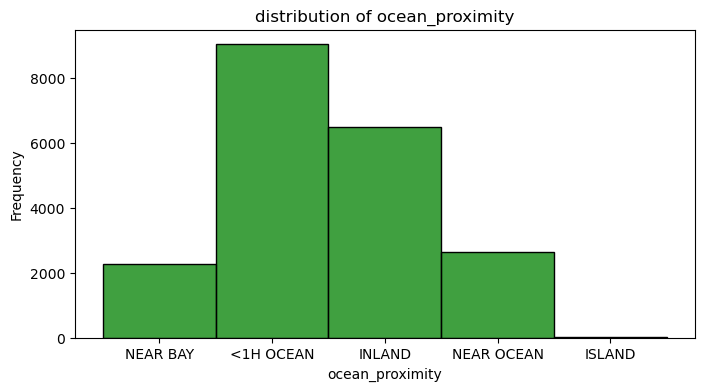

In [12]:
for i in house.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(house[i],color='green',bins=30)
    plt.title(f'distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
X=house.iloc[:,:9]
Y=house['median_house_value']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [19]:
X_train.shape

(15324, 9)

In [20]:
X_test.shape

(5109, 9)

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
Y_predict=lr.predict(X_test)

In [23]:
df=pd.DataFrame({'Actual':Y_test,
                'Predict':Y_predict})
df.tail()

Actual   Predict
9893   154000.0  154000.0
13788   35000.0   35000.0
8070   418600.0  418600.0
6036   117800.0  117800.0
11747  236500.0  236500.0

In [24]:
df1=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
df1

Coefficient
longitude          -7.218785e-11
latitude           -7.071654e-11
housing_median_age -1.709729e-12
total_rooms         1.983483e-14
total_bedrooms     -1.102330e-13
population         -2.102485e-15
households         -6.429189e-14
median_income      -4.472613e-11
median_house_value  1.000000e+00

In [25]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(Y_test,Y_predict))
print("MAE:",metrics.mean_absolute_error(Y_test,Y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

MSE: 6.622969152234812e-21
MAE: 6.145186358426597e-11
RMSE: 8.138162662563837e-11


In [26]:
from sklearn.metrics import r2_score
print("R2_score:",metrics.r2_score(Y_test,Y_predict))

R2_score: 1.0


# USA Housing

In [29]:
usa=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Python Scripts/ML/USA_Housing.csv')
usa.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [30]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [31]:
usa.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928700  9.975771e+05  
50%                        4.050000     36199.406690  1.232669e+06  
75%                        4.490000     42861.290770  1.471210e+06  
max                        6.500000     69621.713380  2.469066e+06

In [32]:
usa.corr()

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

In [33]:
usa.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

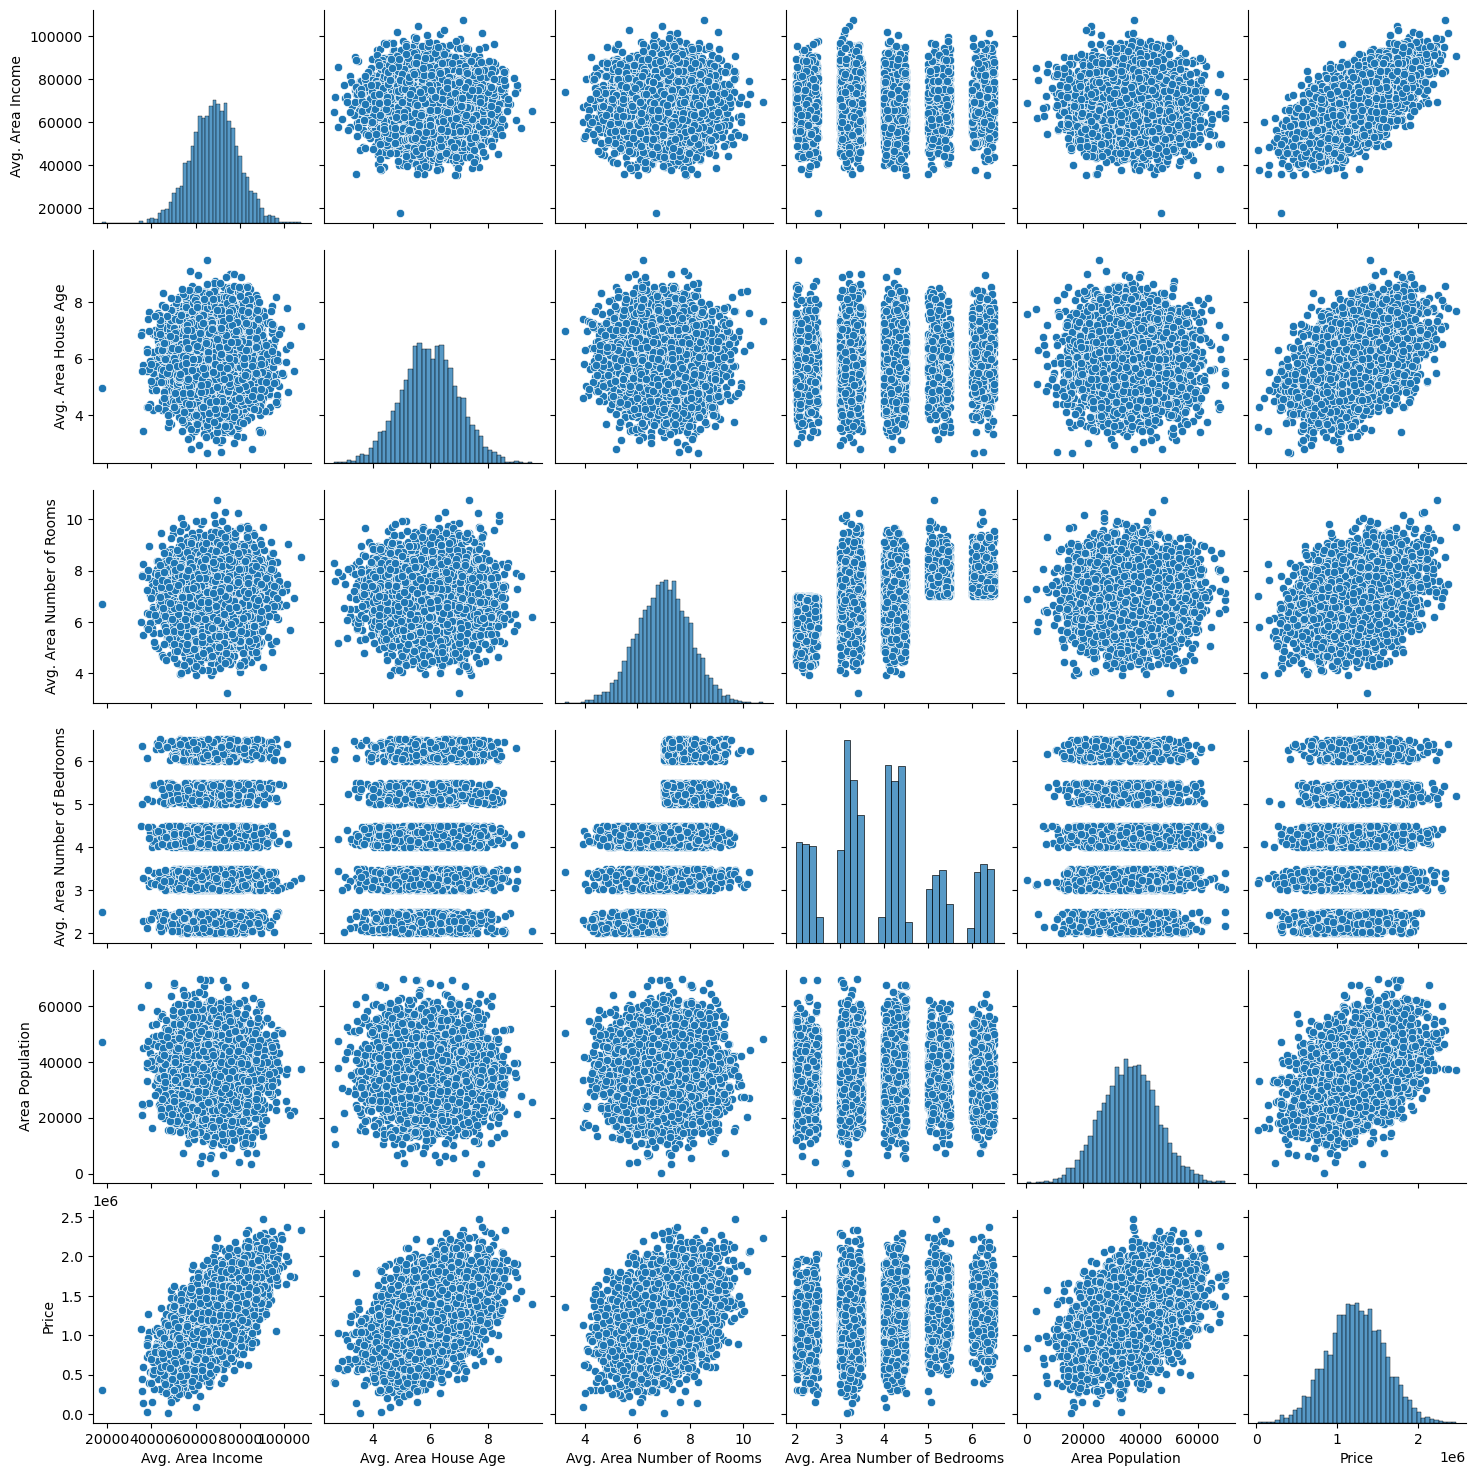

In [34]:
#EDA
sns.pairplot(usa)

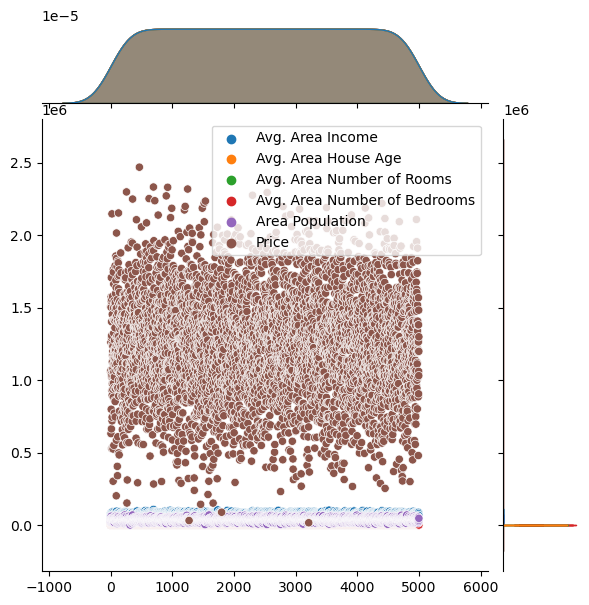

In [35]:
sns.jointplot(usa)

<Axes: >

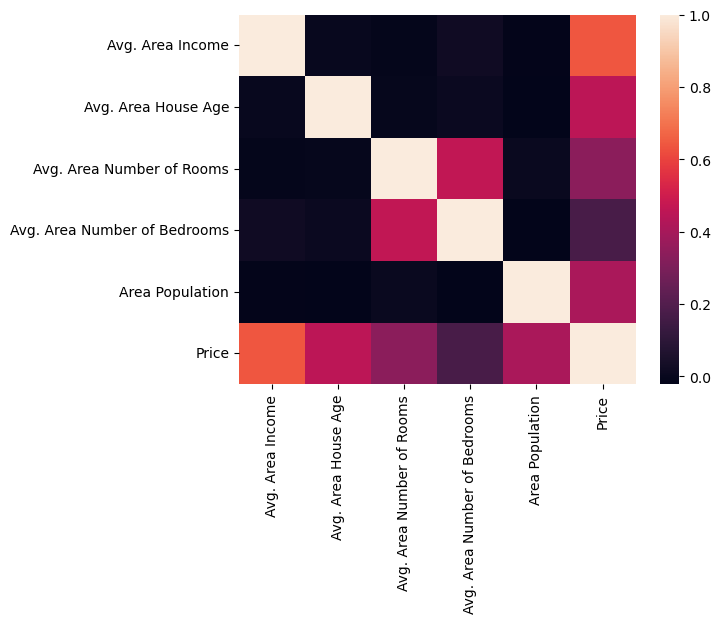

In [36]:
sns.heatmap(usa.corr())

<Axes: xlabel='Price', ylabel='Density'>

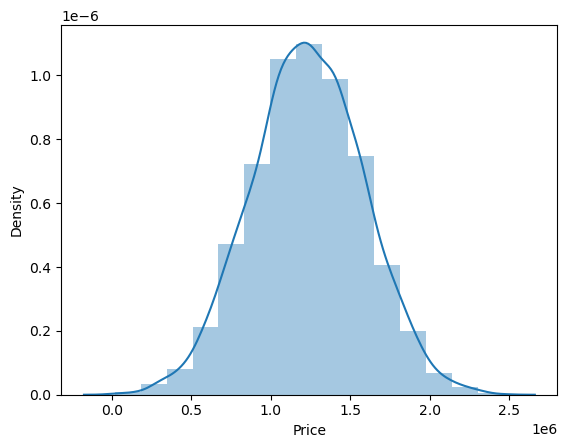

In [37]:
sns.distplot(usa['Price'],bins=15,kde=True)

In [39]:
X=usa.iloc[:,:6]
Y=usa['Price']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [43]:
Y_predict=lm.predict(X_test)

In [46]:
df=pd.DataFrame({'Actual':Y_test,
             'Predict':Y_predict})
df.tail()

Actual       Predict
1881  1.727211e+06  1.727211e+06
2800  1.707270e+06  1.707270e+06
1216  1.167450e+06  1.167450e+06
1648  7.241217e+05  7.241217e+05
3063  1.561234e+06  1.561234e+06

In [49]:
df1=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
df1

Coefficient
Avg. Area Income             -3.906200e-15
Avg. Area House Age          -6.956125e-11
Avg. Area Number of Rooms    -1.641594e-11
Avg. Area Number of Bedrooms -2.553710e-12
Area Population              -2.215079e-15
Price                         1.000000e+00

In [50]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(Y_test,Y_predict))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

MSE: 1.204446228523896e-19
MAE: 2.5769986677914857e-10
RMSE: 3.470513259625867e-10


In [51]:
from sklearn.metrics import r2_score
print('R2_Score:',metrics.r2_score(Y_test,Y_predict))

R2_Score: 1.0
